In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\manir\Desktop\BLOG\datavis\cleaned_hnsc.csv")

print("Dataset loaded successfully.")

Dataset loaded successfully.


In [3]:
print(df.columns)

Index(['Hugo_Symbol', 'Chromosome', 'Start_position', 'End_position',
       'Reference_Allele', 'Tumor_Seq_Allele2', 'Variant_Classification',
       'Variant_Type', 'Tumor_Sample_Barcode'],
      dtype='object')


In [4]:
# Display the first few rows to understand the structure of the dataset
print(df.head())

  Hugo_Symbol Chromosome  Start_position  End_position      Reference_Allele  \
0         DST          6        56483890      56483894                 ATTTA   
1      CDKN2A          9        21971036      21971055  CGCGCACGTCCAGCCGCGCC   
2      CEP131         17        79172734      79172735                    GC   
3     FAM126B          2       201846517     201846517                     G   
4        POLG         15        89873479      89873488            CCACCAGCCG   

  Tumor_Seq_Allele2 Variant_Classification Variant_Type Tumor_Sample_Barcode  
0                 -        Frame_Shift_Del          DEL                 KQ06  
1                 -        Frame_Shift_Del          DEL                 KQ07  
2                 -        Frame_Shift_Del          DEL                 KQ03  
3                 -        Frame_Shift_Del          DEL                 KQ10  
4                 -        Frame_Shift_Del          DEL                 KQ10  


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
df.describe()

,Start_position,End_position
count,1.813000e+04,1.813000e+04
mean,7.612853e+07,7.612853e+07
std,5.781322e+07,5.781322e+07
min,3.992200e+04,3.992200e+04
25%,3.148956e+07,3.148956e+07
50%,5.956107e+07,5.956107e+07
75%,1.143992e+08,1.143992e+08
max,2.492111e+08,2.492111e+08


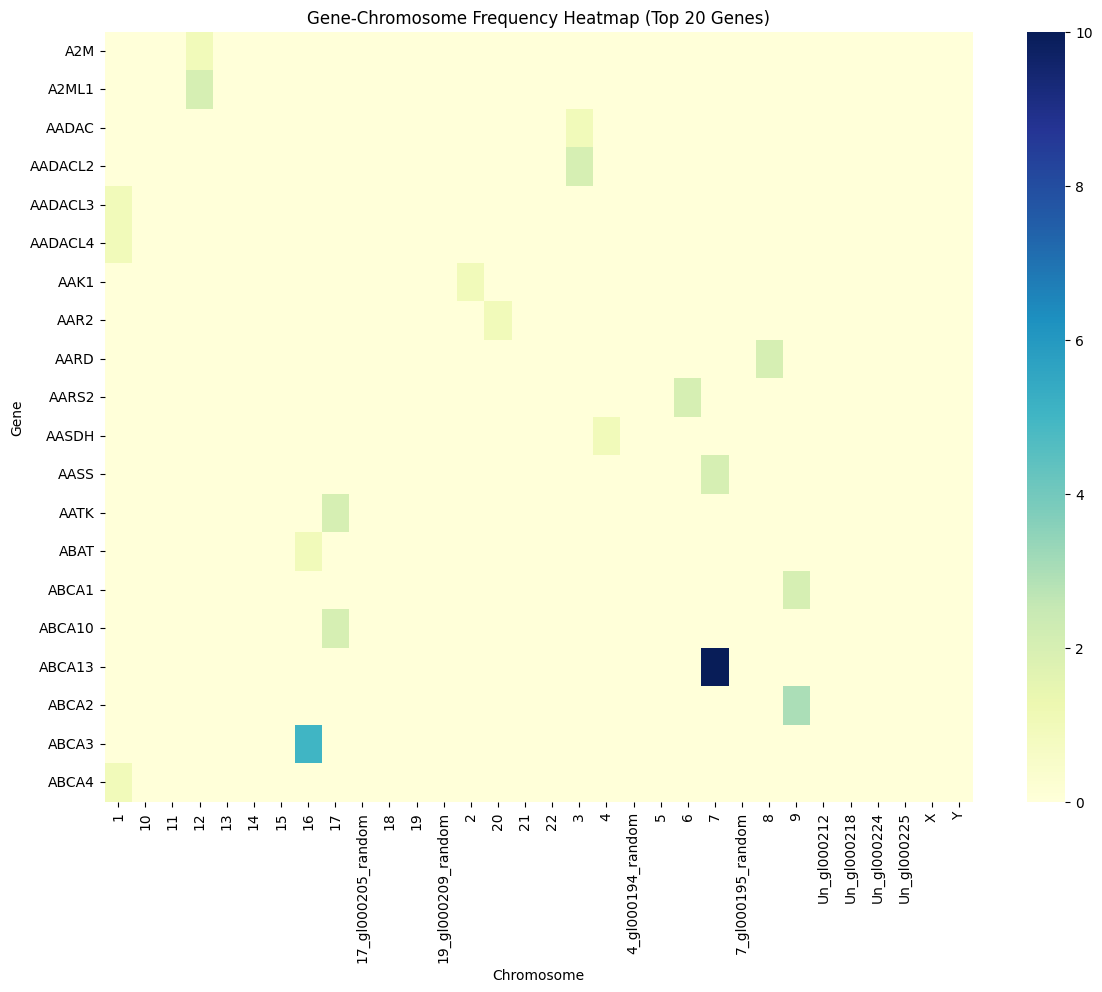

In [8]:

# Remove "chr" prefix from Chromosome column, if not done already
df['Chromosome'] = df['Chromosome'].str.replace('chr', '')

# Create a gene-chromosome frequency table
gene_chromosome_counts = df.groupby(['Hugo_Symbol', 'Chromosome']).size().unstack(fill_value=0)

# Plot the heatmap (Top 20 genes for readability)
plt.figure(figsize=(14, 10))
sns.heatmap(gene_chromosome_counts.iloc[:20, :], cmap="YlGnBu", annot=False)
plt.title("Gene-Chromosome Frequency Heatmap (Top 20 Genes)")
plt.xlabel("Chromosome")
plt.ylabel("Gene")
plt.show()


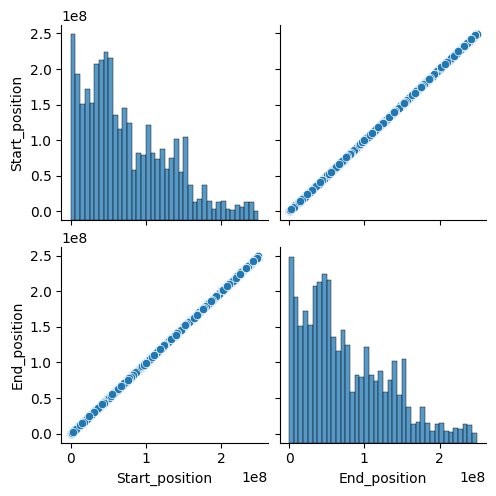

In [7]:
sns.pairplot(df)

Chromosome-wise Density Plot

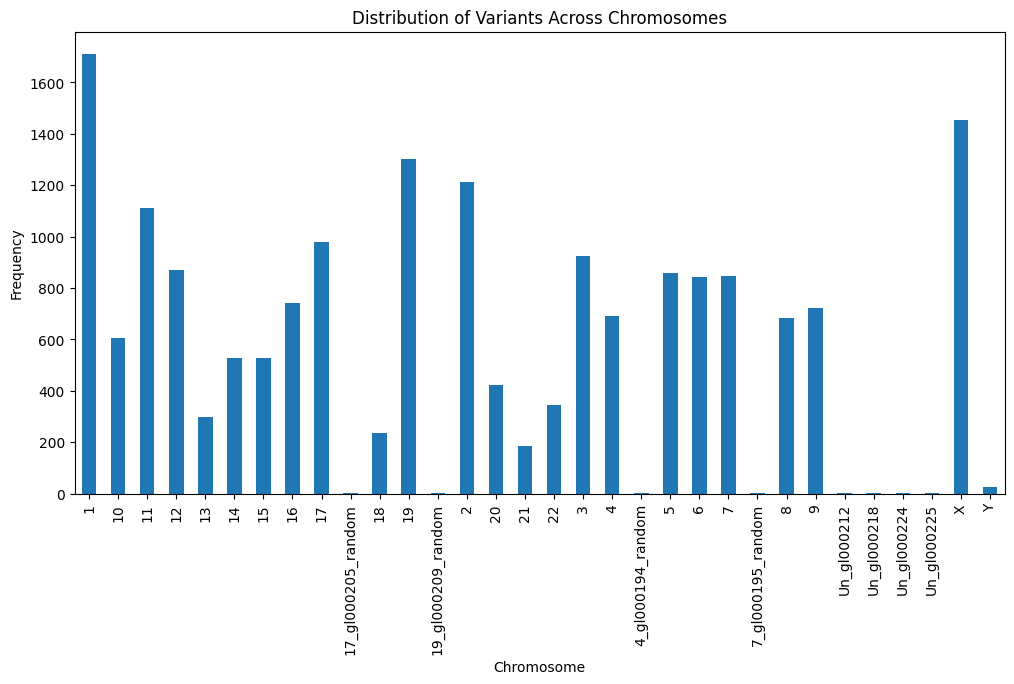

In [11]:
import matplotlib.pyplot as plt

# Plot chromosome-wise distribution as a histogram
plt.figure(figsize=(12, 6))
df['Chromosome'].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Variants Across Chromosomes")
plt.xlabel("Chromosome")
plt.ylabel("Frequency")
plt.show()



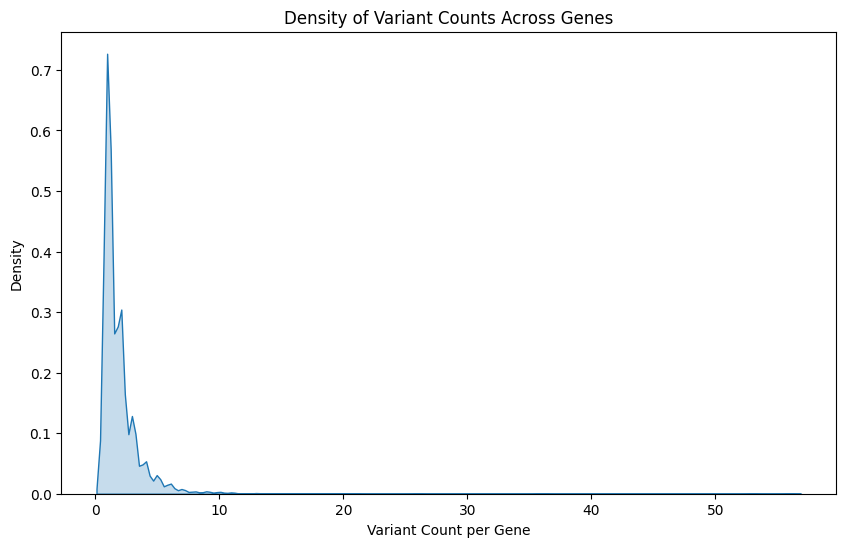

In [12]:
import seaborn as sns

# Count variants per gene
gene_counts = df['Hugo_Symbol'].value_counts()

# Plot gene-wise density using KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(gene_counts, fill=True)
plt.title("Density of Variant Counts Across Genes")
plt.xlabel("Variant Count per Gene")
plt.ylabel("Density")
plt.show()


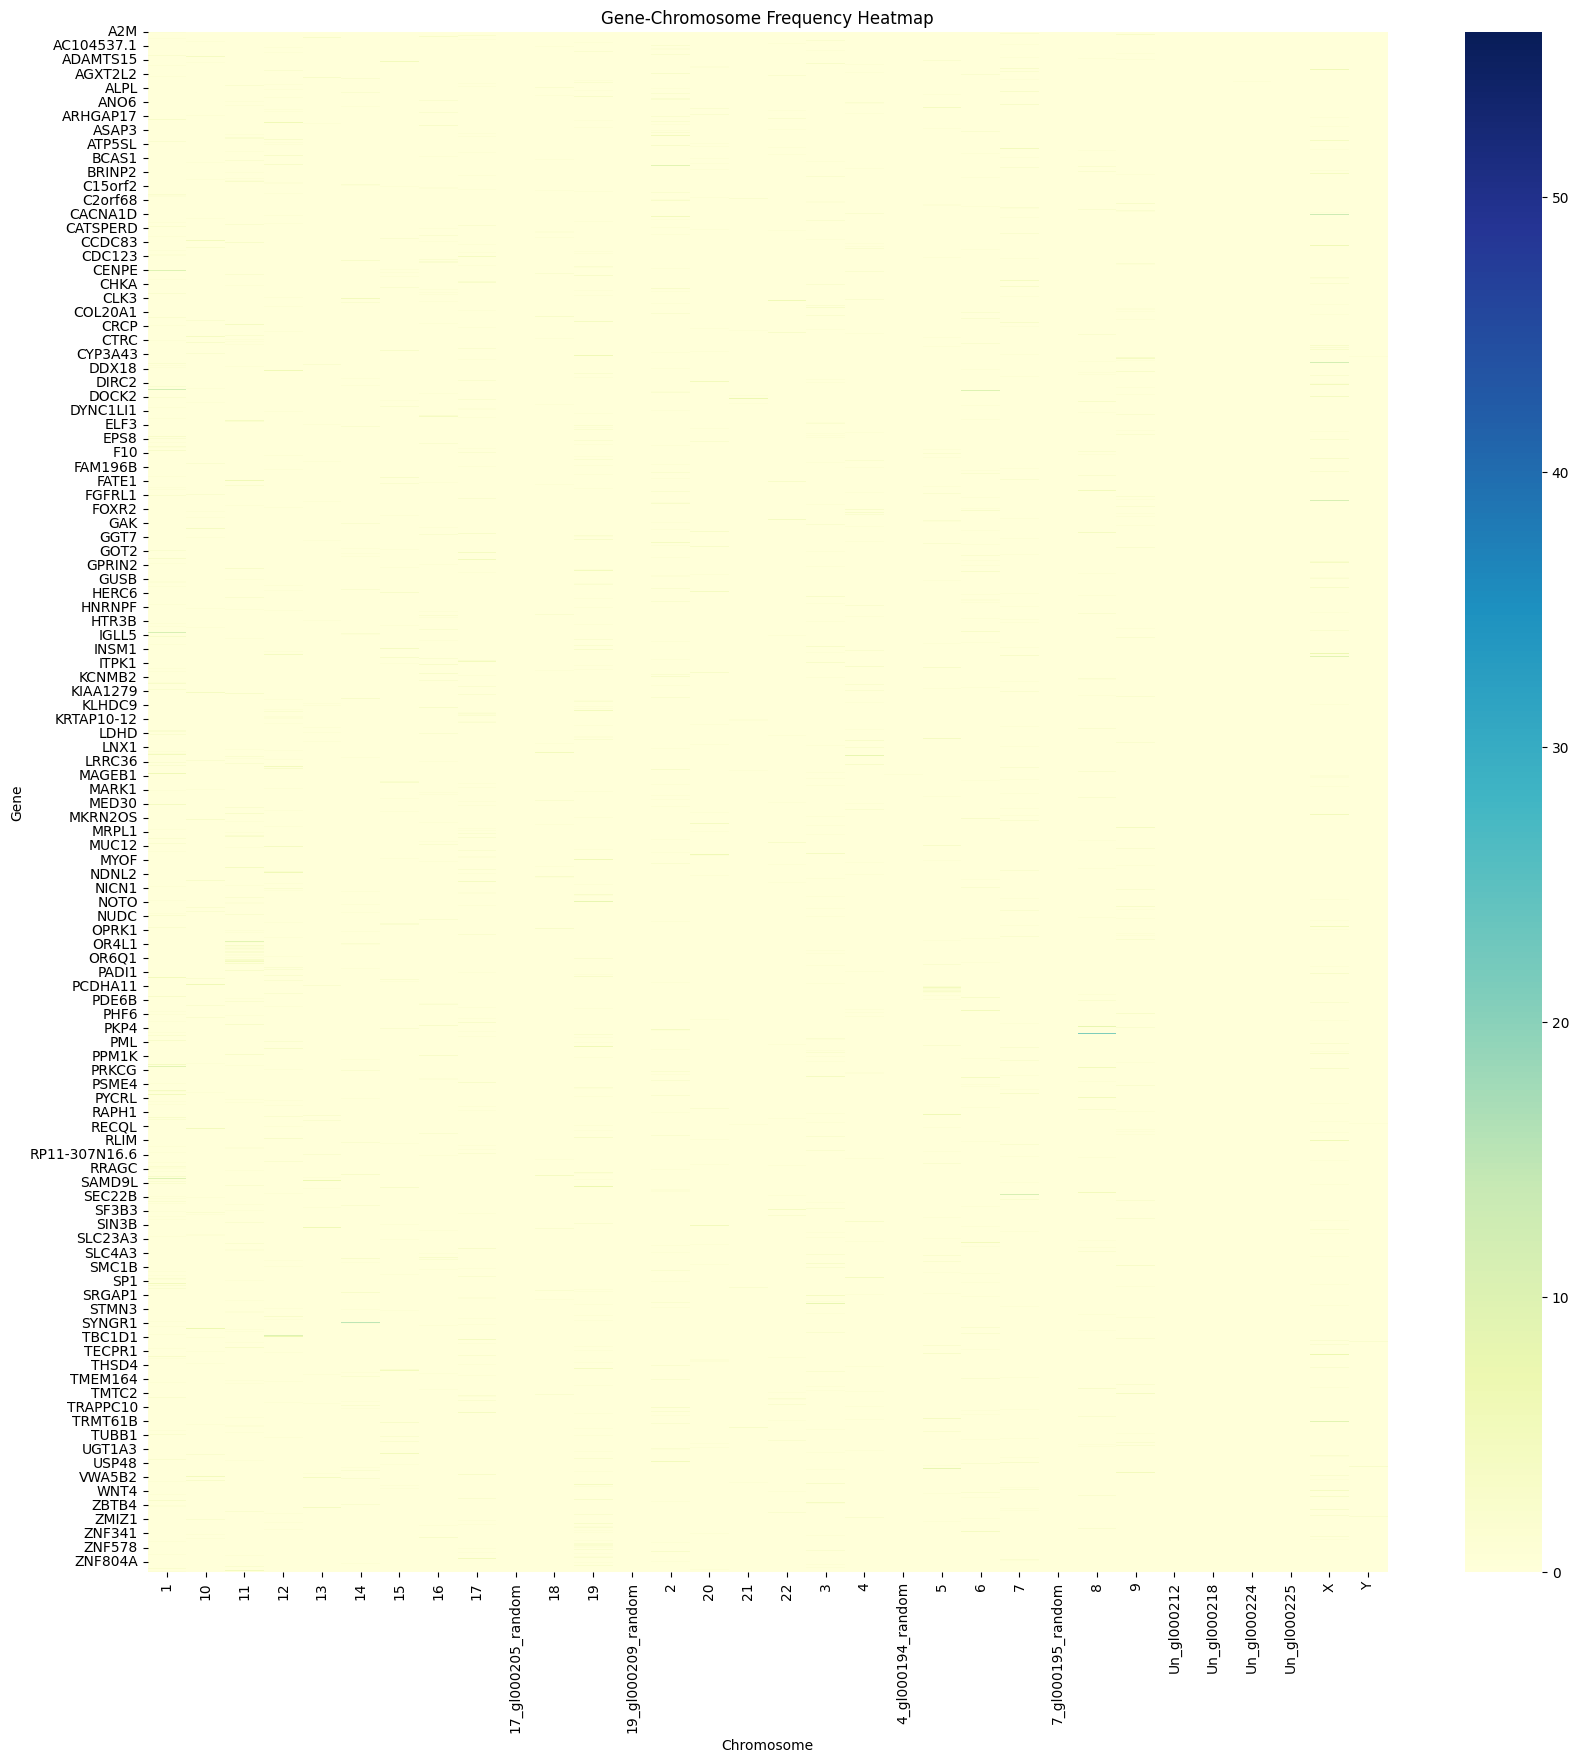

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each gene-chromosome pair
gene_chromosome_counts = df.groupby(['Hugo_Symbol', 'Chromosome']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(20, 20))  # Adjust size for readability
sns.heatmap(gene_chromosome_counts, cmap="YlGnBu", cbar=True)
plt.title("Gene-Chromosome Frequency Heatmap")
plt.xlabel("Chromosome")
plt.ylabel("Gene")
plt.show()

